In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# Code

In [2]:
# create a population with of dimension**2 individuals
# with contamination% of contamination chance

@njit
def make_initial_population(dimension, contamination):

  pop = np.zeros((dimension, dimension), dtype=np.int8)

  for i in range(dimension):
    for j in range(dimension):
      if contamination > np.random.random():
        pop[i,j] = 1

  return pop

In [3]:
# evolution of population from probabilities c and r
# of contamination and recovery

@njit
def evolve_pop(pop, c, r, additive_contamination=False):

  evol = pop.copy()

  I, J = pop.shape
  for i in range(I-1):
    for j in range(J-1):

      # contaminated individuals may recover
      if pop[i,j] == 1:
        if r > np.random.random():
          evol[i,j] = 2

      # healthy individuals may get contaminated
      elif pop[i,j] == 0:
        vectors = pop[i-1,j] == 1
        vectors += pop[i+1,j] == 1
        vectors += pop[i,j-1] == 1
        vectors += pop[i,j+1] == 1

        if not additive_contamination:
          vectors = vectors > 0

        if c * vectors> np.random.random():
          evol[i,j] = 1

    # last column
    j = J - 1
    if pop[i,j] == 1:
      if r > np.random.random():
        evol[i,j] = 2

    elif pop[i,j] == 0:
      vectors = pop[i-1,j] == 1
      vectors += pop[i+1,j] == 1
      vectors += pop[i,j-1] == 1
      vectors += pop[i,0] == 1

      if not additive_contamination:
        vectors = vectors > 0

      if c * vectors> np.random.random():
        evol[i,j] = 1

  # last lin
  i = I - 1
  for j in range(J-1):

    if pop[i,j] == 1:
      if r > np.random.random():
        evol[i,j] = 2

    elif pop[i,j] == 0:
      vectors = pop[i-1,j] == 1
      vectors += pop[0,j] == 1
      vectors += pop[i,j-1] == 1
      vectors += pop[i,j+1] == 1

      if not additive_contamination:
        vectors = vectors > 0

      if c * vectors> np.random.random():
        evol[i,j] = 1

  # last element
  j = J - 1
  if pop[i,j] == 1:
    if r > np.random.random():
      evol[i,j] = 2

  elif pop[i,j] == 0:
    vectors = pop[i-1,j] == 1
    vectors += pop[0,j] == 1
    vectors += pop[i,j-1] == 1
    vectors += pop[i,0] == 1

  if not additive_contamination:
    vectors = vectors > 0

  if c * vectors> np.random.random():
    evol[i,j] = 1

  return evol

# Simulation

In [4]:
# set parameters

dimension = 64

initial_contaminations = 0.01

contamination_rate = 0.99

recovery_rate = 0.05

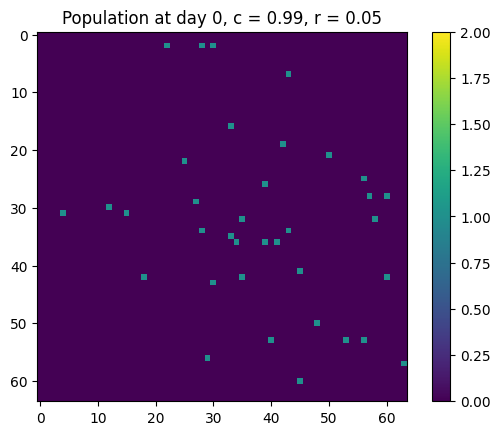

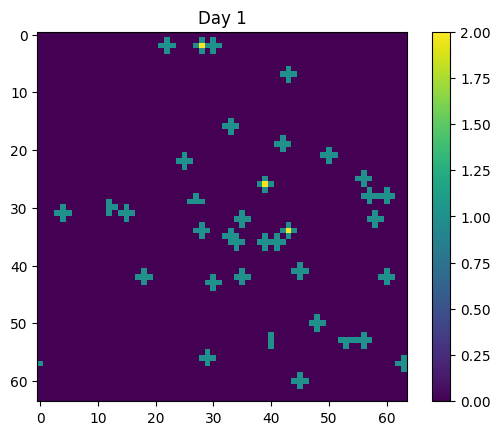

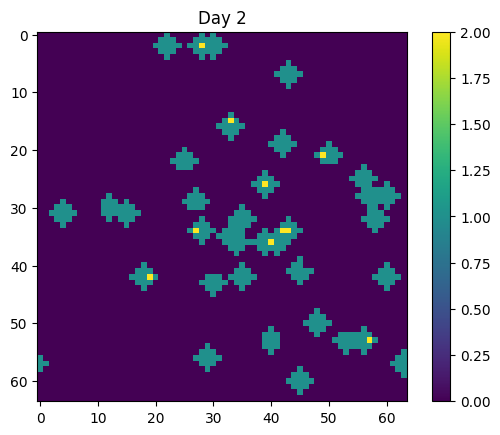

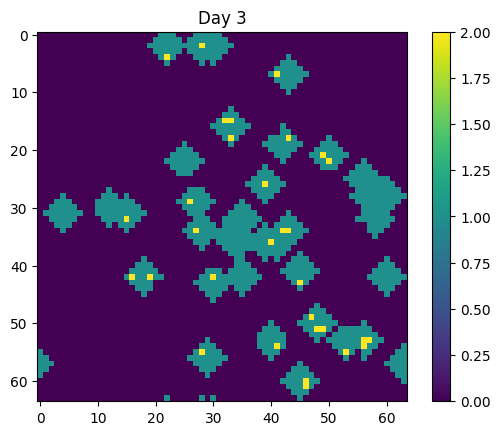

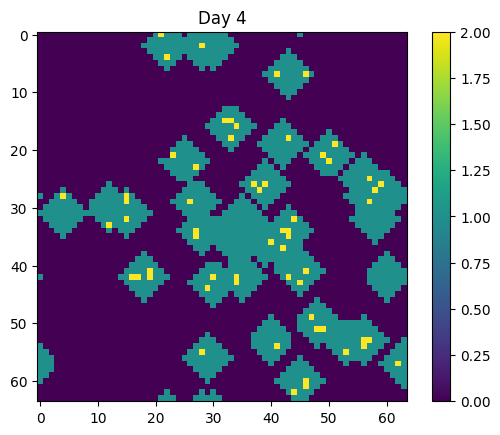

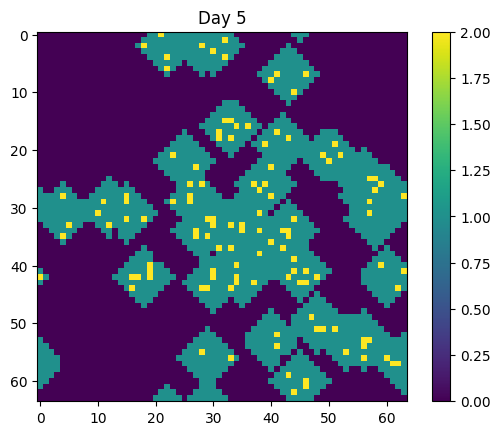

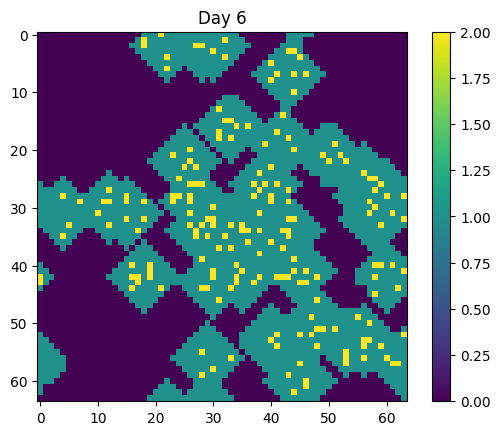

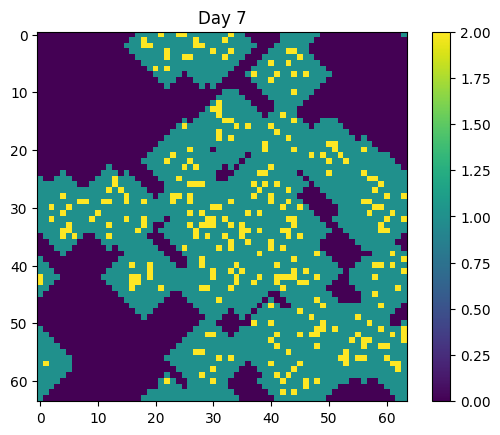

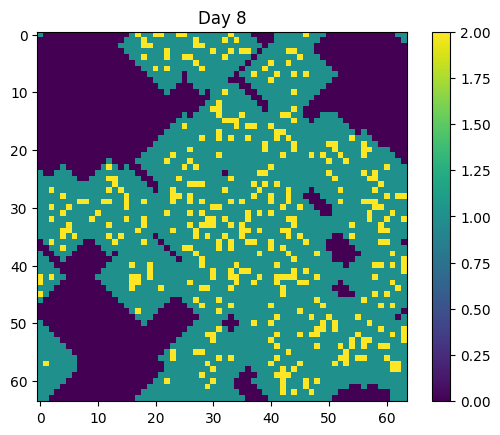

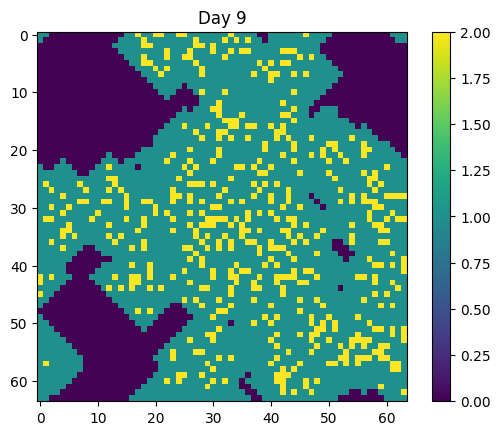

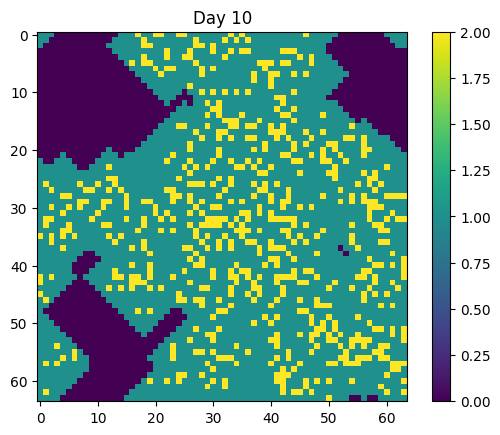

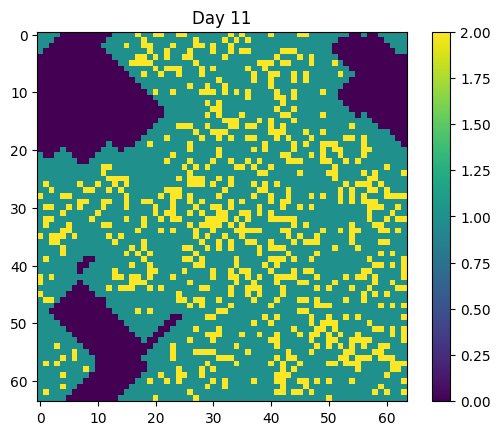

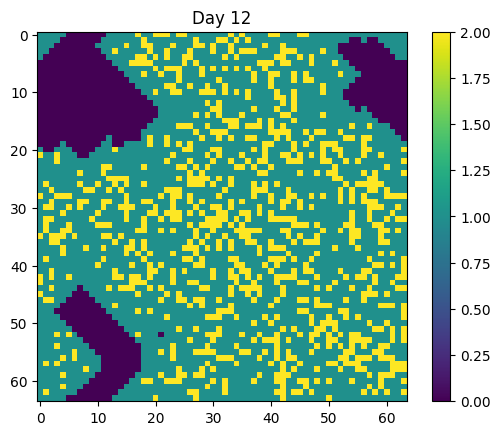

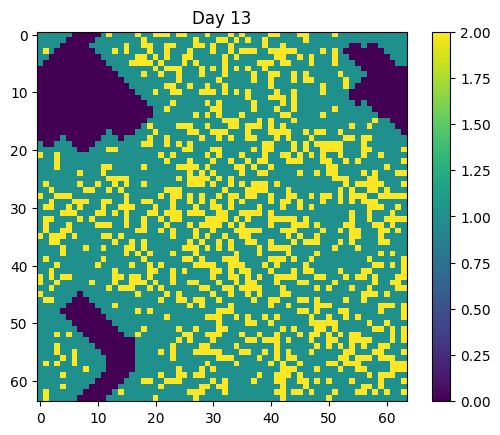

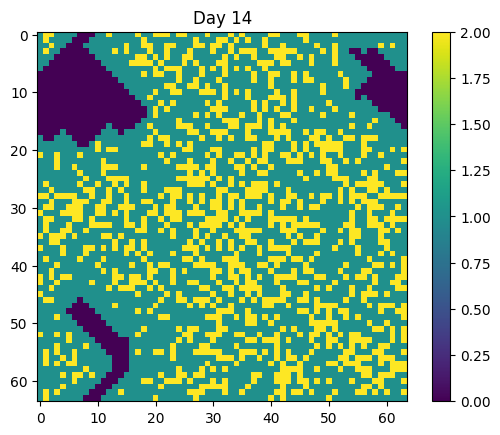

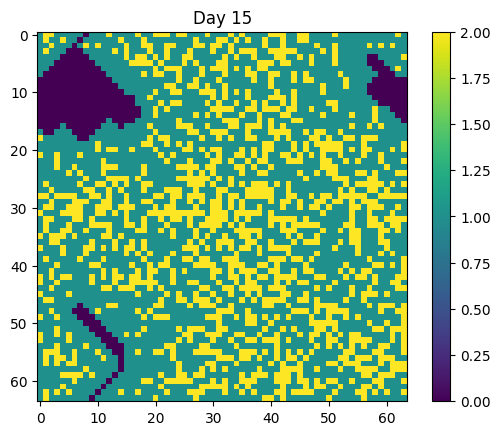

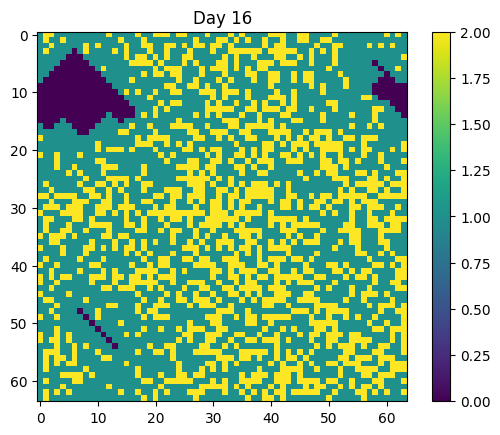

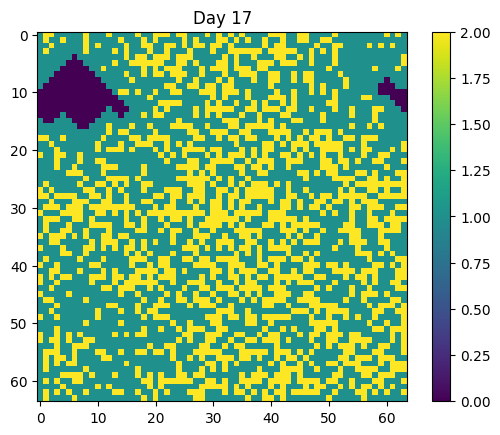

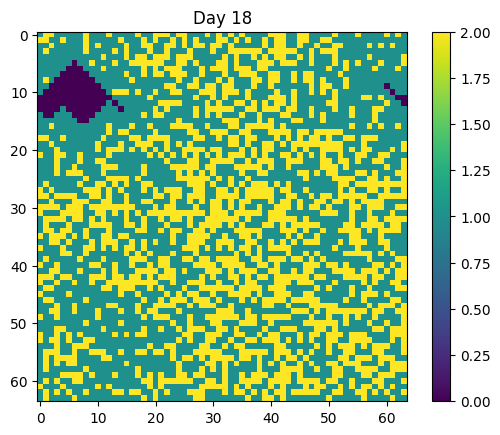

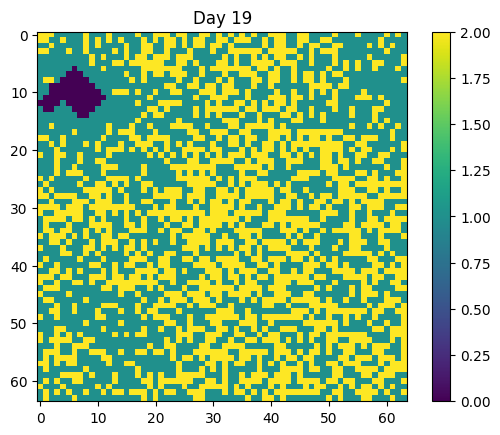

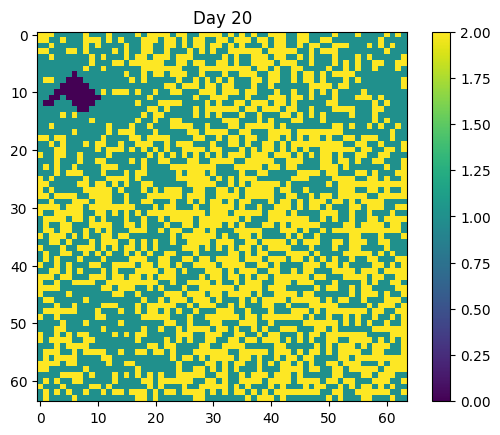

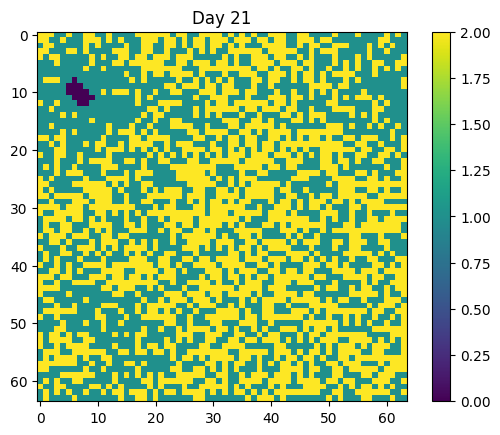

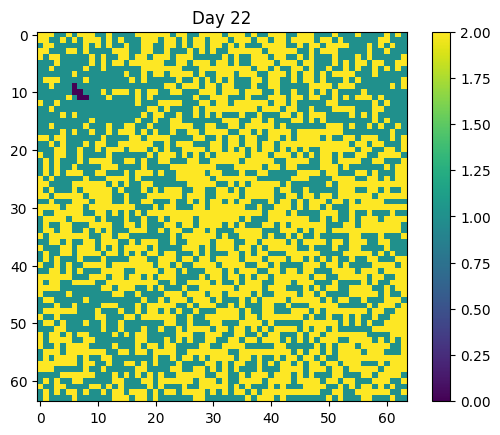

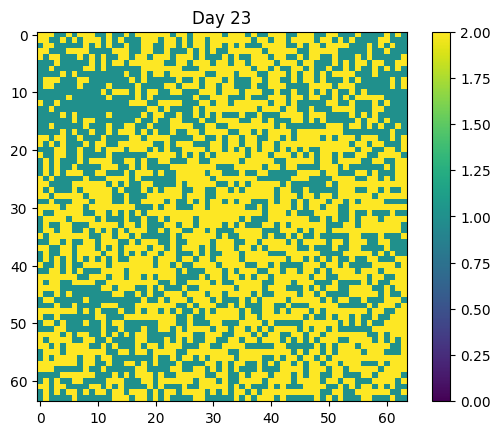

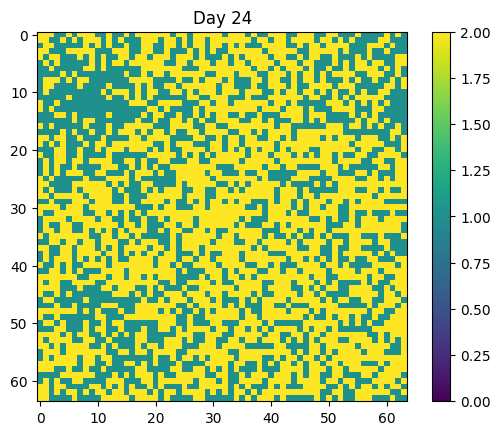

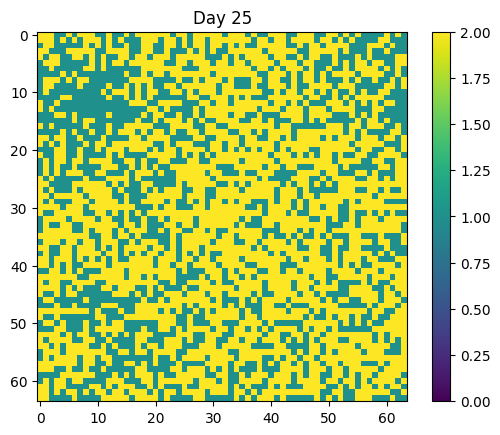

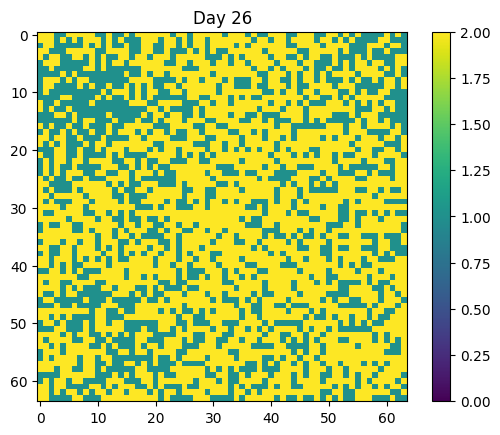

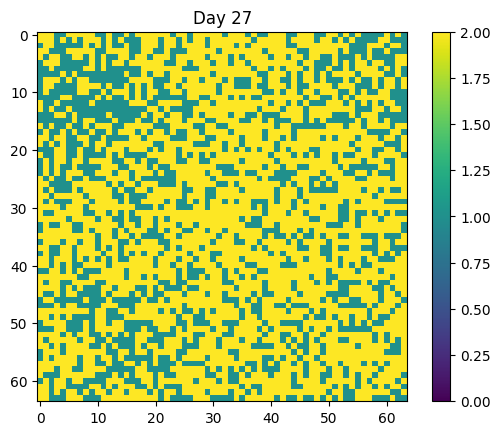

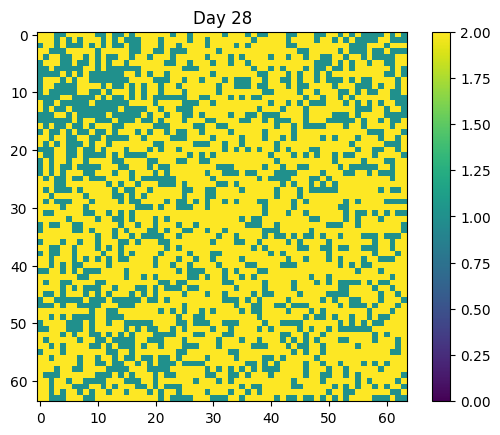

In [5]:
# run simulation

pop = make_initial_population(dimension, initial_contaminations)

plt.imshow(pop, vmin=0, vmax=2)
plt.colorbar()
plt.title('Population at day 0, c = ' + str(contamination_rate) + ', r = ' + str(recovery_rate))
plt.show()

for days in range(1,29):
  pop = evolve_pop(pop, contamination_rate, recovery_rate)
  plt.imshow(pop, vmin=0, vmax=2)
  plt.colorbar()
  plt.title('Day ' + str(days))
  plt.show()